# Session 4: Homework Solutions

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import string  # For punctuation hygiene
import re # For Unicode hygiene

wdict = {}

with open('/content/drive/MyDrive/Colab Notebooks/Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    while line:

        # Here we use the translation table to annihilate all punctuation.
        line.translate(str.maketrans('','', string.punctuation))

        # Here we remove Unicode.  The regular expression '[^\x00-\x7f]' means "any character not
        # in the vanilla ASCII character set" (codes 0-127, or in hexadecimal, \x00-\x7f). The 'sub'
        # method maps anything outside this range to None. Consult 'help(re)' for more detail.
        line = re.sub(r'[^\x00-\x7f]', r'', line)

        # Everything to lower-case
        line = line.lower()

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('the', 9198)
('project', 89)
('gutenberg', 83)
('ebook', 8)
('of', 4505)
('life', 54)
('on', 886)
('mississippi', 109)
('this', 724)
('is', 1081)
('for', 1060)
('use', 37)
('anyone', 4)
('anywhere', 8)
('in', 2520)
('united', 37)
('states', 35)
('and', 5844)
('most', 123)
('other', 231)
('parts', 6)
('world', 42)
('at', 735)
('no', 352)
('cost', 19)
('with', 1063)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('you', 911)
('may', 87)
('copy', 12)
('it,', 200)
('give', 75)
('it', 1725)
('away', 109)
('or', 569)
('re-use', 2)
('under', 117)
('terms', 24)
('license', 14)
('included', 2)
('online', 4)
('www.gutenberg.org.', 4)
('if', 365)
('are', 366)
('not', 703)
('located', 9)
('states,', 8)
('will', 291)
('have', 559)
('to', 3542)
('check', 4)
('laws', 14)
('country', 51)
('where', 160)
('before', 156)
('using', 10)
('ebook.', 2)
('title:', 1)
('author:', 1)
('mark', 11)
('twain', 6)
('release', 1)
('date:', 1)
('july', 7)
('10,', 2)
('2004', 1)
('[ebook', 1)
('#245]', 1)
('rec

In [23]:
from operator import itemgetter # for 'sorted' to sort on the frequency.  See 'help(itemgetter)'.

witems = wdict.items()

# This call to 'sorted' resorts witems by the second element of each entry, i.e. the frequency count
witems = sorted(witems, key=itemgetter(1), reverse=True )

for item in list(witems)[:100]:
    print (item)


('the', 9198)
('and', 5844)
('of', 4505)
('a', 4001)
('to', 3542)
('in', 2520)
('i', 2092)
('was', 2022)
('it', 1725)
('that', 1614)
('he', 1350)
('is', 1081)
('with', 1063)
('for', 1060)
('his', 956)
('had', 952)
('but', 925)
('you', 911)
('on', 886)
('as', 864)
('they', 744)
('at', 735)
('this', 724)
('not', 703)
('by', 672)
('all', 661)
('one', 618)
('were', 610)
('be', 597)
('or', 569)
('my', 569)
('from', 565)
('have', 559)
('we', 507)
('when', 491)
('there', 486)
('so', 470)
('would', 469)
('which', 464)
('out', 451)
('an', 436)
('up', 430)
('their', 377)
('are', 366)
('if', 365)
('no', 352)
('me', 339)
('then', 331)
('been', 327)
('him', 322)
('about', 318)
('could', 300)
('has', 298)
('into', 297)
('river', 297)
('them', 295)
('will', 291)
('its', 278)
('down', 273)
('some', 263)
('two', 258)
('what', 255)
('new', 246)
('said', 237)
('her', 233)
('other', 231)
('any', 227)
('these', 227)
('she', 227)
('time', 226)
('got', 225)
('who', 215)
('do', 214)
('it.', 208)
('it,', 200)


In [ ]:
# We will let numpy handle looping/sums for us
import numpy as np


# Get the total number of tokens in the corpus. We do this by converting the frequency counts
# to a numpy array, and letting numpy handle the looping ops. This is _much_ faster than writing
# our own python loops. But you knew that already, right?
freq = np.array(list(witems))[:,1]
freq = np.array(freq, dtype=np.int64)

vocab_size = len(freq) # How many words in the vocabulary
total_tokens = freq.sum() # How many tokens in the corpus

print("Vocabulary size = %d"%vocab_size )
print("Total number of tokens = %d"%total_tokens)

cumulate = freq.cumsum() # This accumulates the counts

# print(cumulate[:10])
#  [ 9255 15147 19679 23732 27324 29917 32210 34415 36508 38232]

threshold = 0.9 * total_tokens
trunc = cumulate[cumulate < threshold]
n_90 = len(trunc)
print("Number of tokens comprising 90%% of the corpus = %d"%n_90)
print("This is (%d / %d) = %f of the vocabulary size."%(n_90, vocab_size, n_90/vocab_size))


Vocabulary size = 14462
Total number of tokens = 147420
Number of tokens comprising 90% of the corpus = 3731
This is (3731 / 14462) = 0.257986 of the vocabulary size.


## Problem 2: Embedding

_Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens._

First, let's reproduce the embedding code in a single cell.

In [26]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary



# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The vocabulary size is:  30522
(30522, 1024)
4000
10000


In [27]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 4.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.532s
[t-SNE] Iteration 50: error = 97.8707047, gradient norm = 0.0072157 (50 iterations in 6.246s)
[t-SNE] It

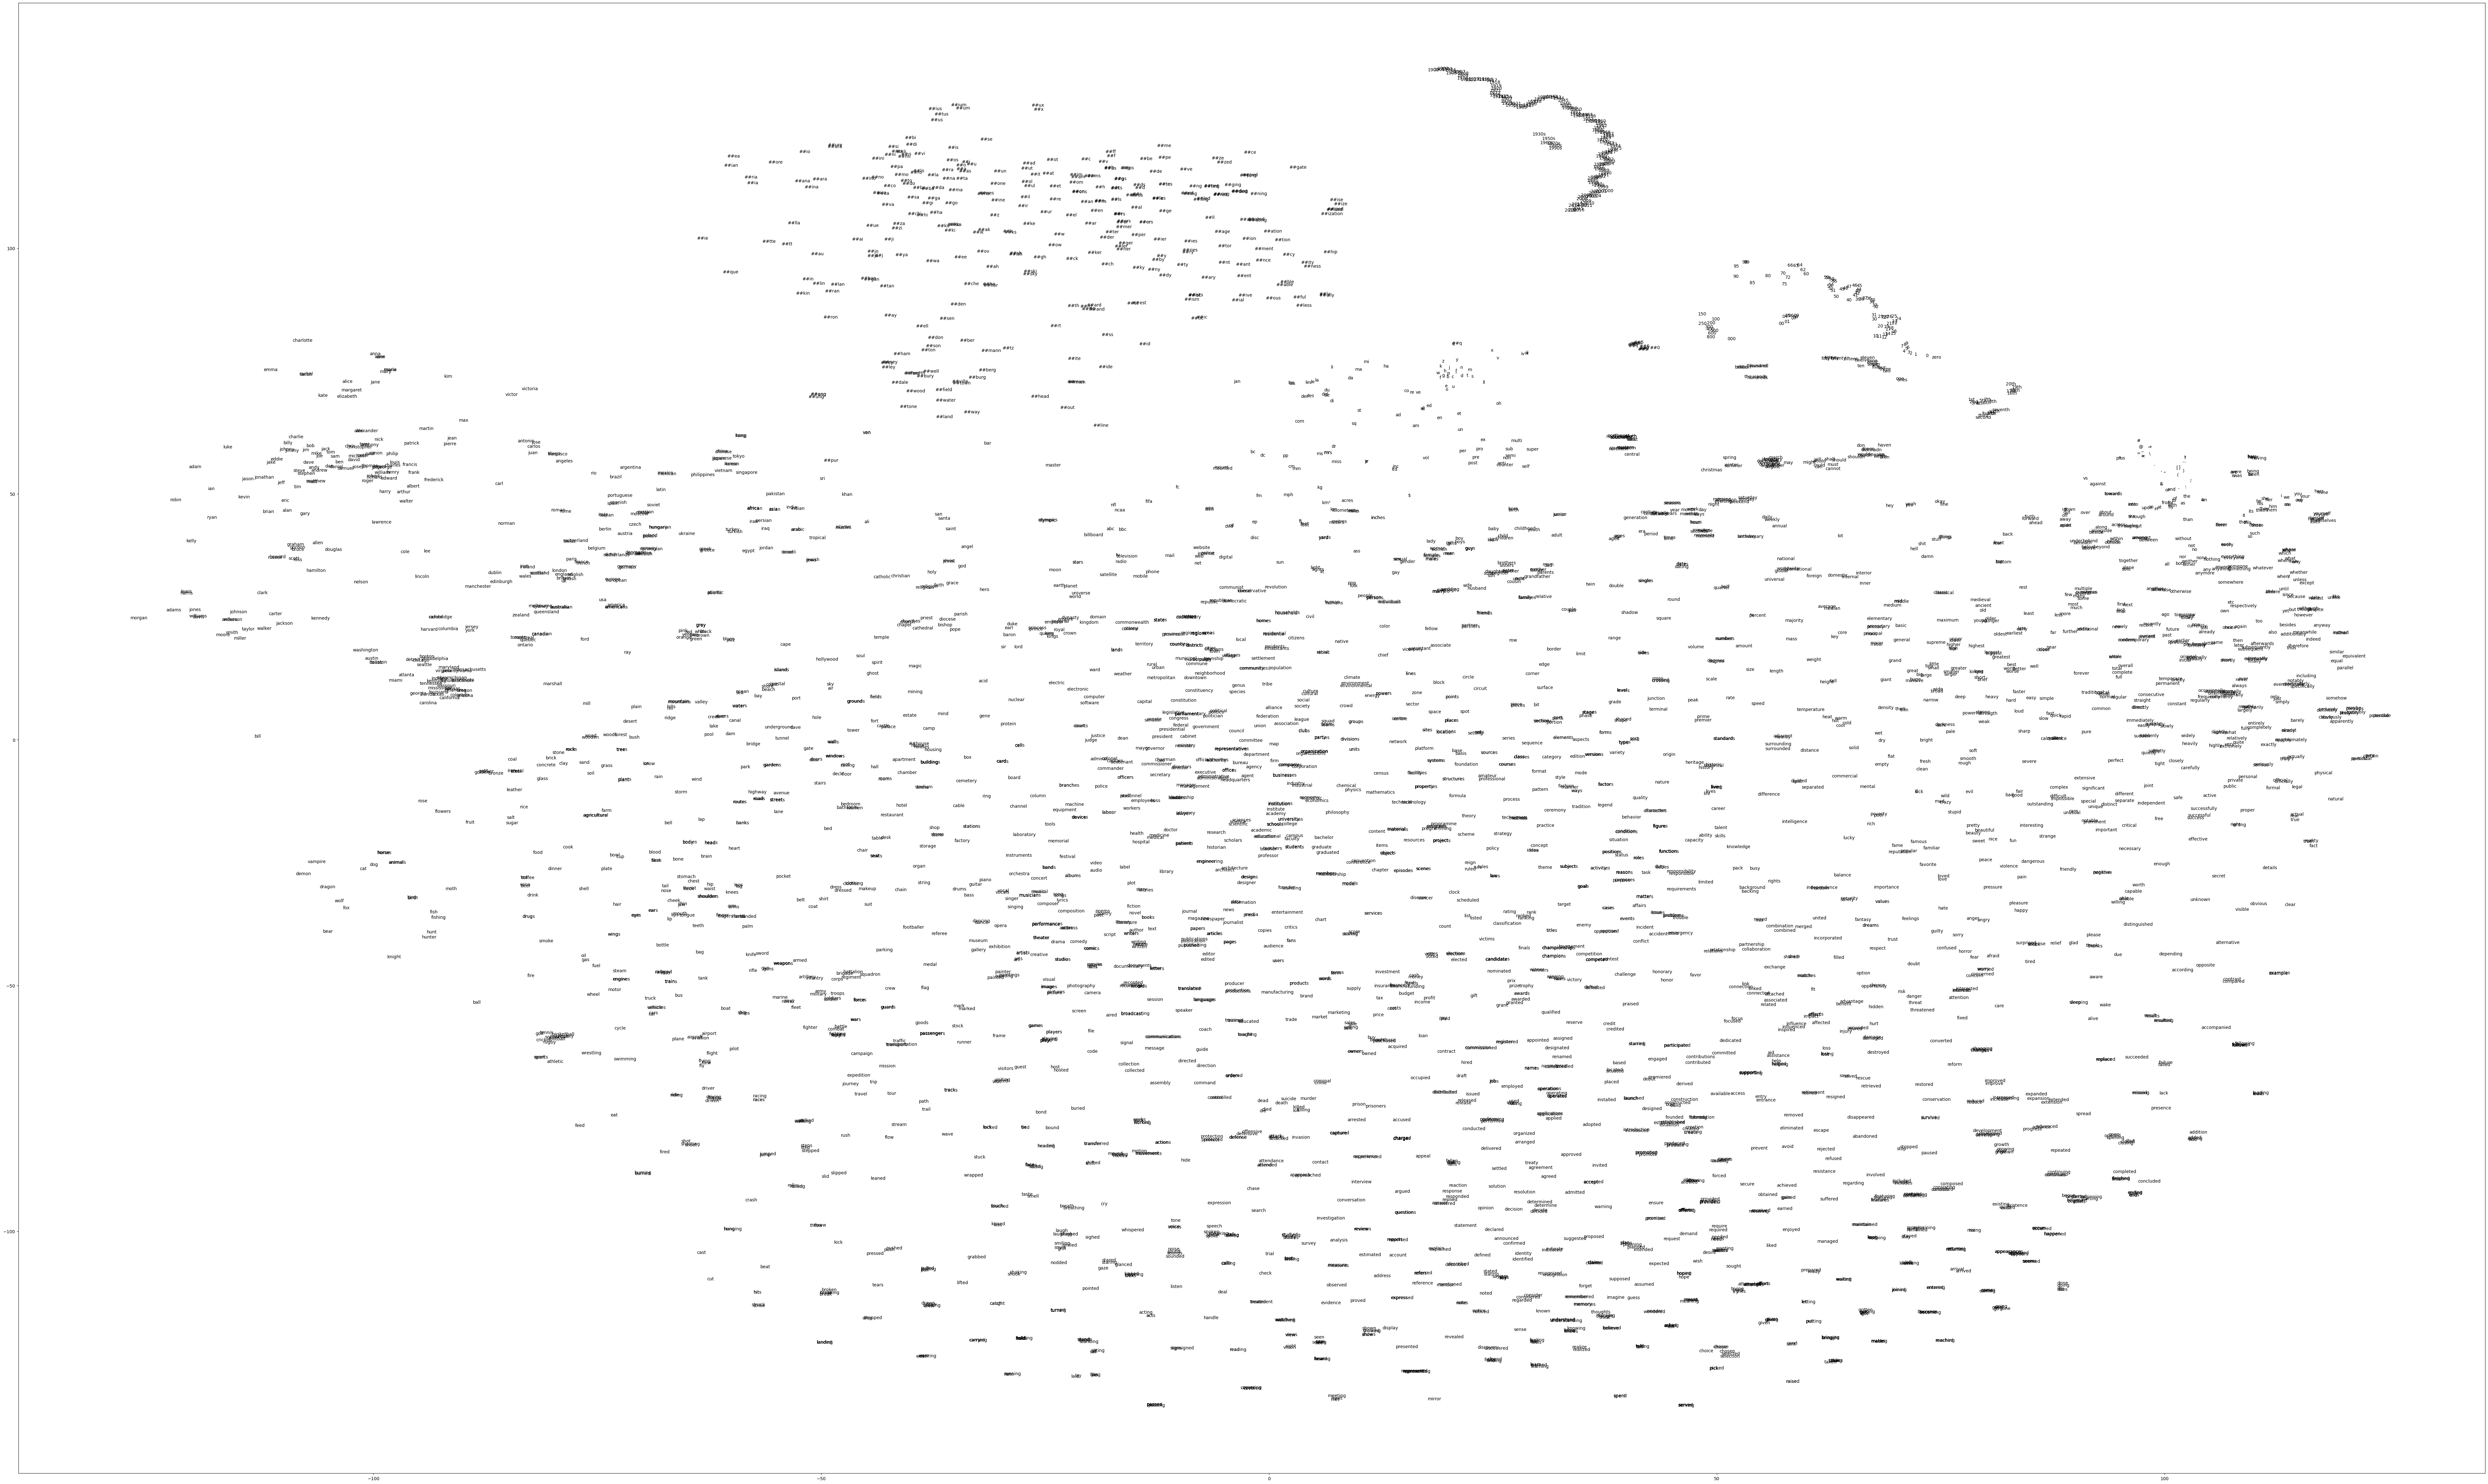

In [28]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()

for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
plt.show()

Now we write a little code to help us zoom in on a desired section of this plot.

Place Names


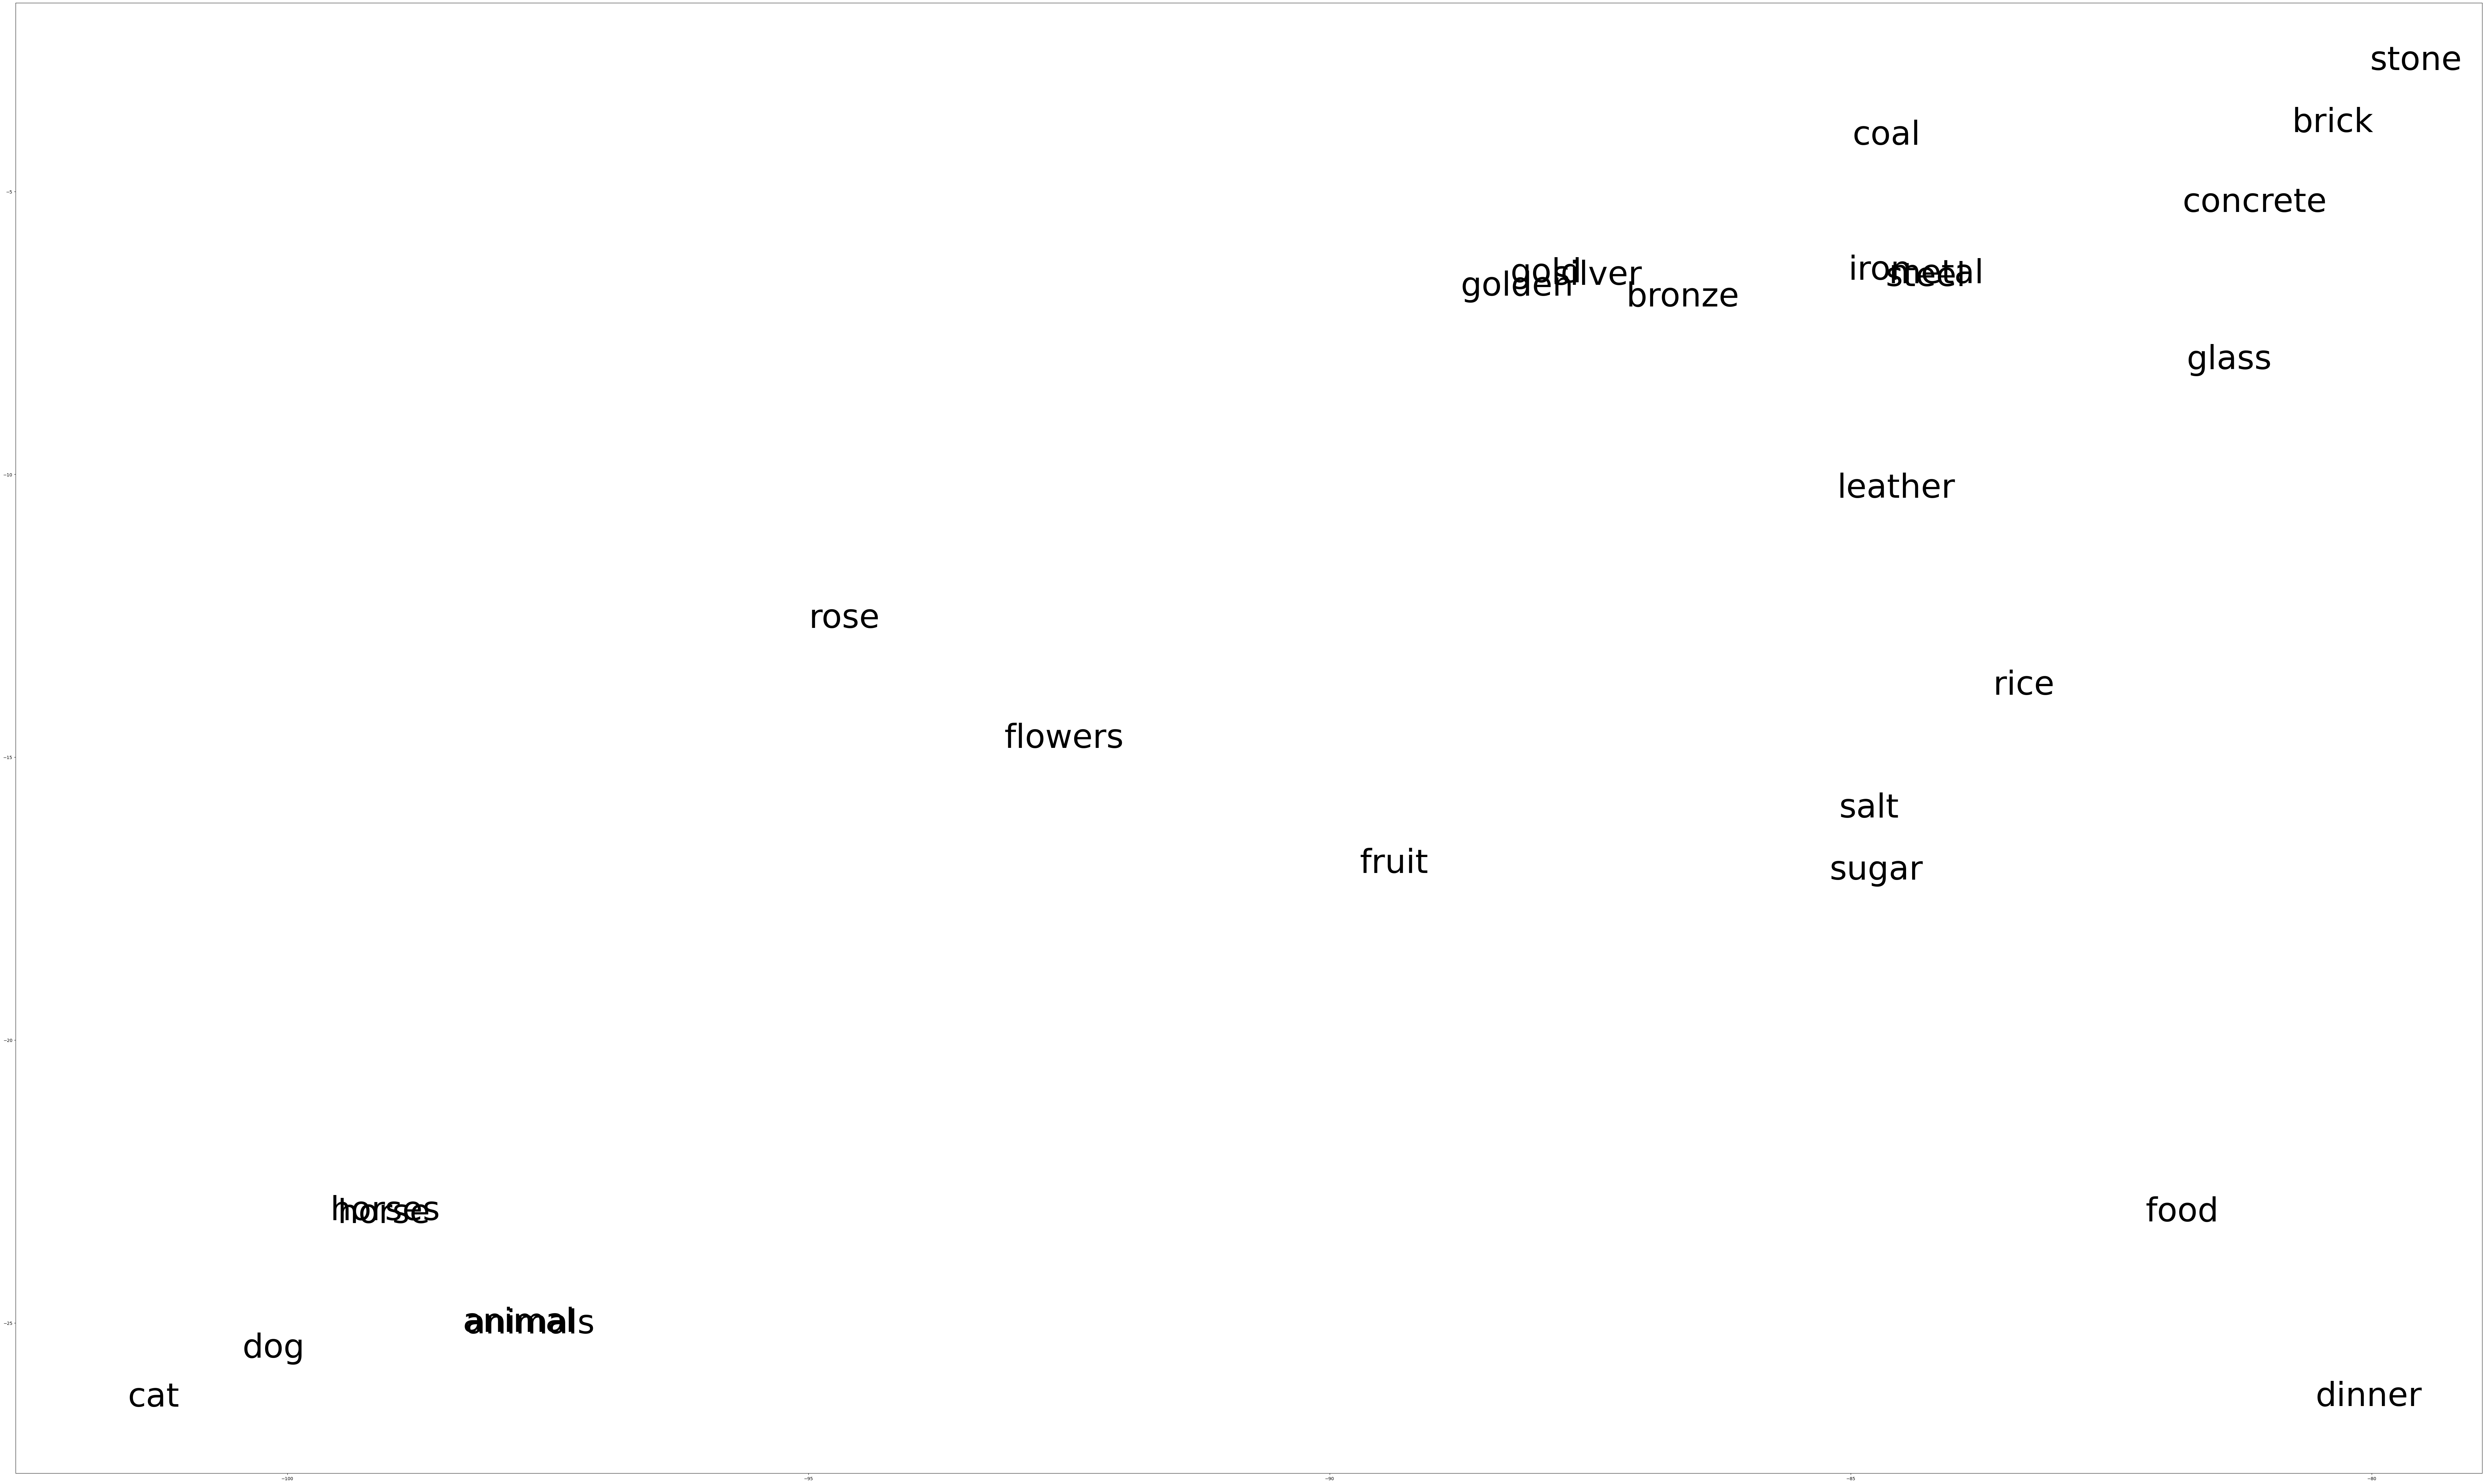

Time relations


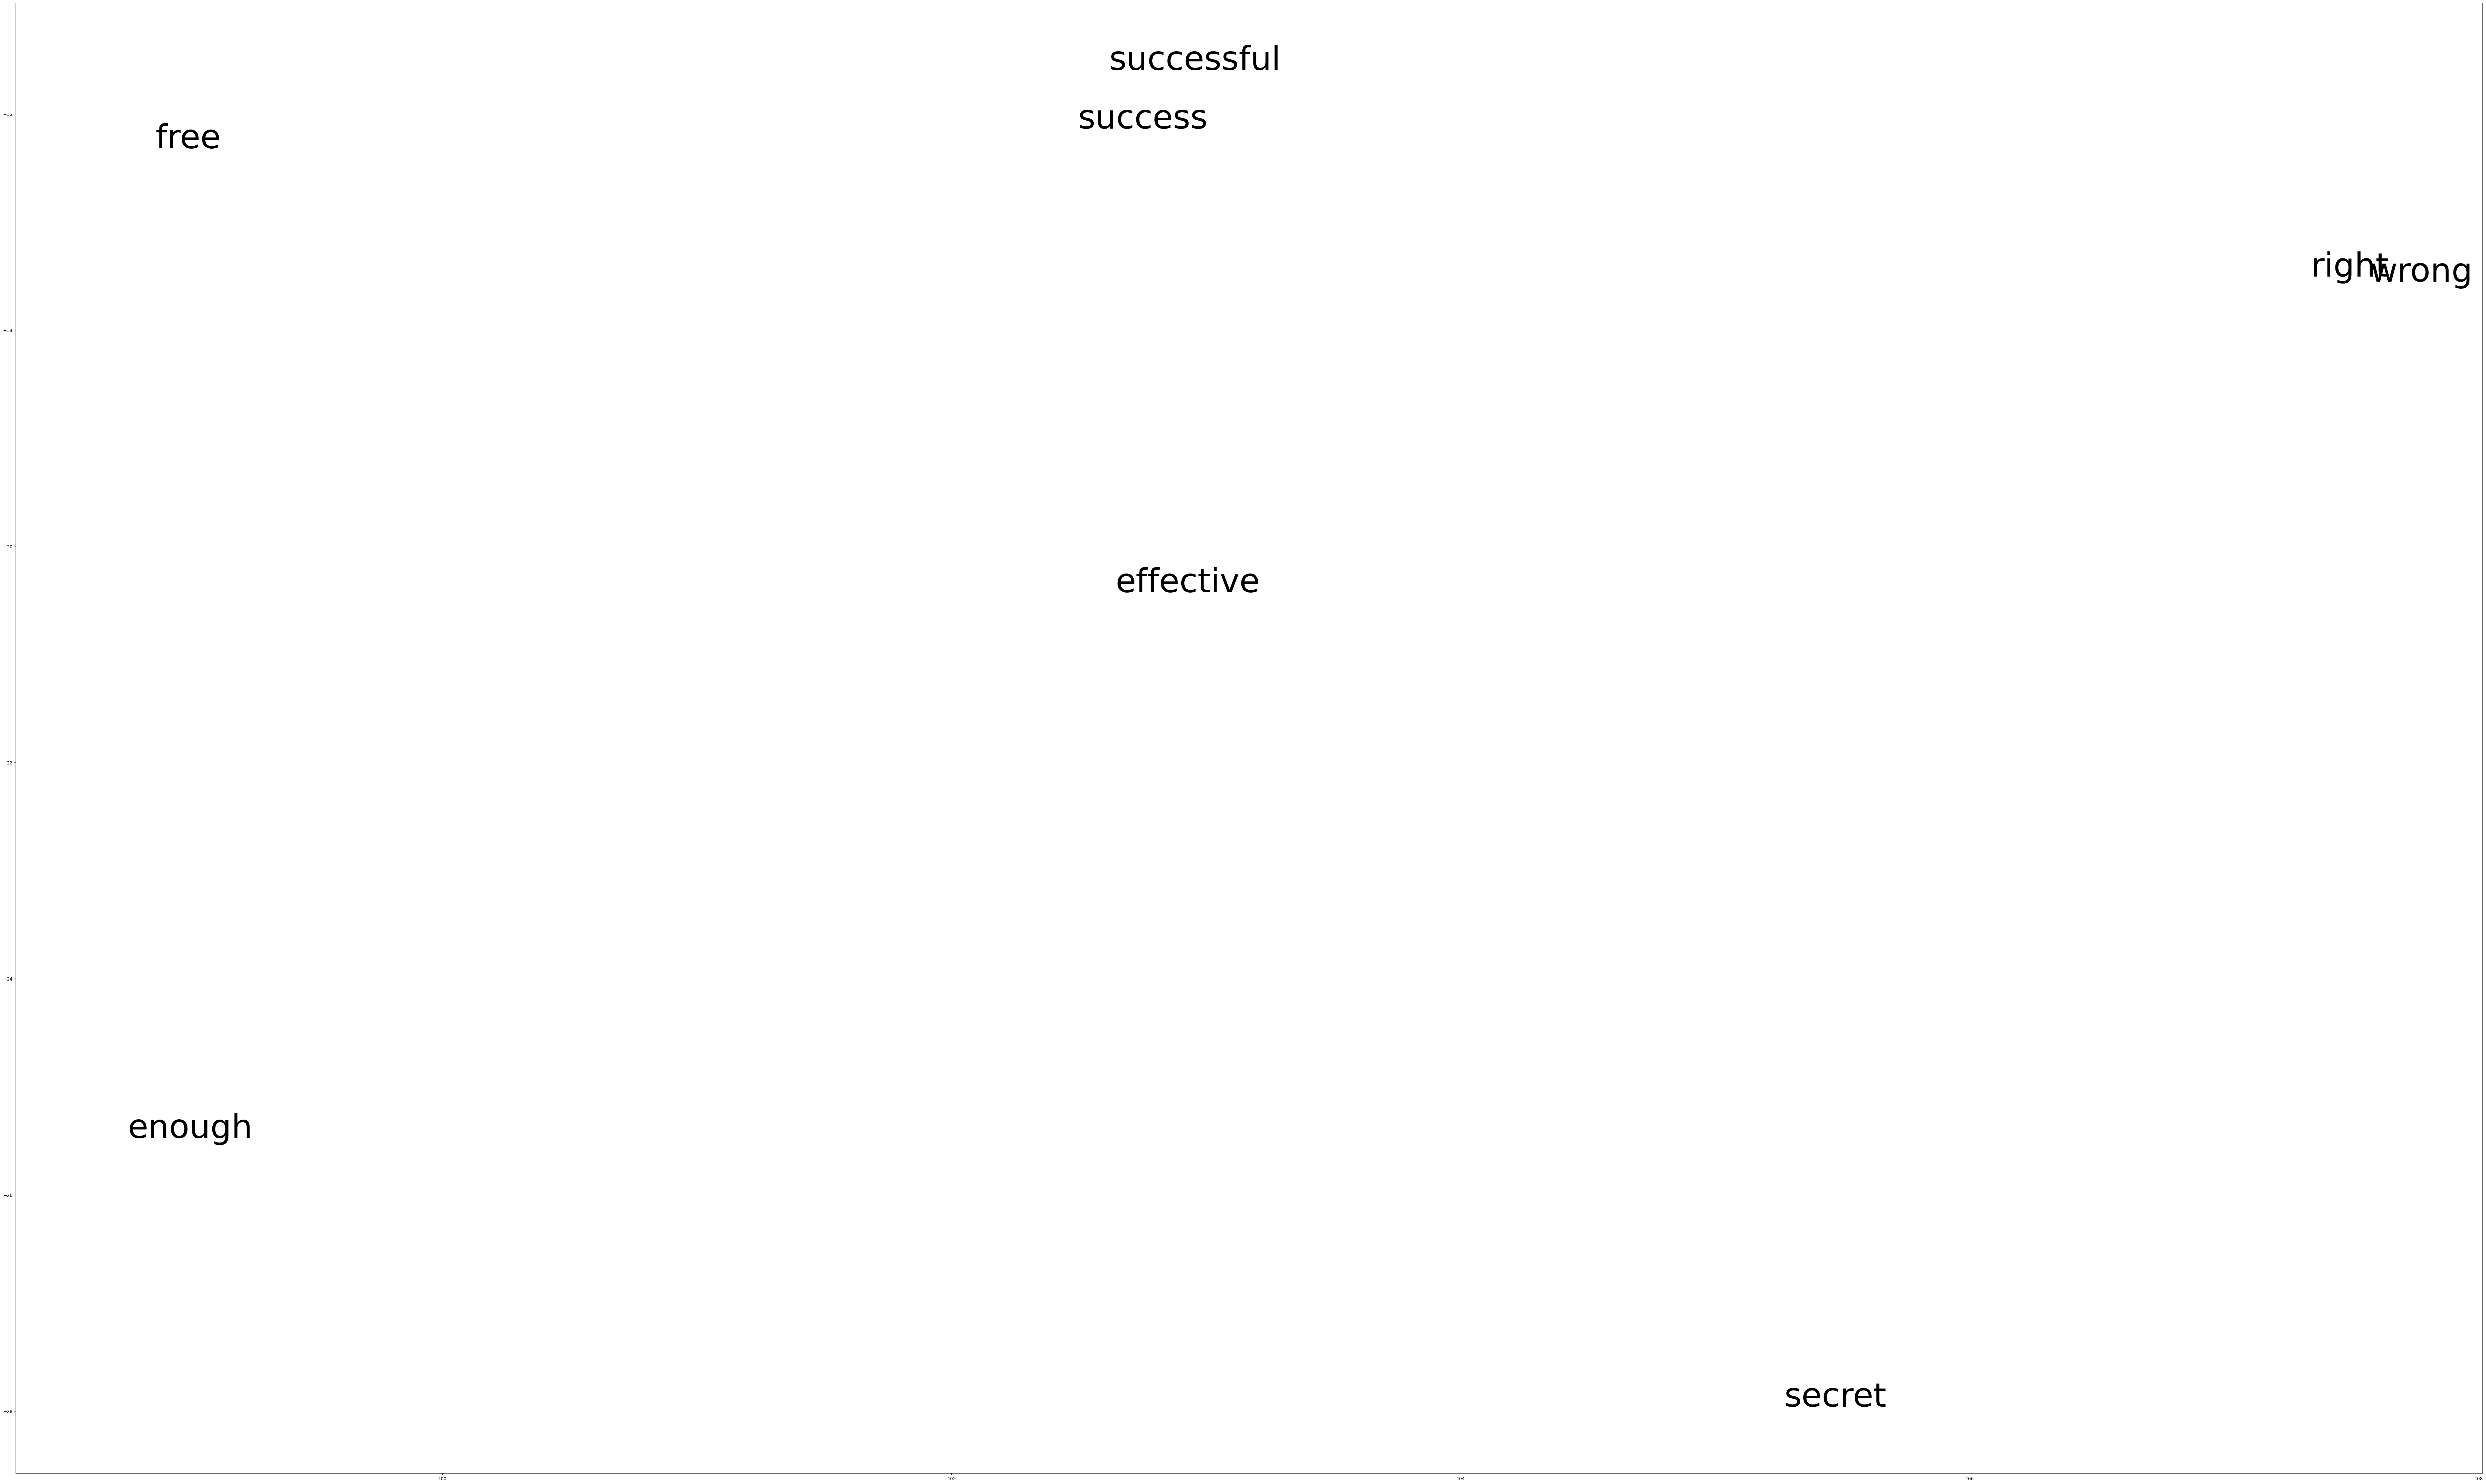

In [29]:
nplotted = len(bert_words_to_plot)

# Get the limits of the embedding region
x_left = np.min(bert_word_embs_to_use_tsne[:nplotted,0])
x_right = np.max(bert_word_embs_to_use_tsne[:nplotted,0])
y_left = np.min(bert_word_embs_to_use_tsne[:nplotted,1])
y_right = np.max(bert_word_embs_to_use_tsne[:nplotted,1])

# Width of embedding region
xwidth = x_right - x_left ; ywidth = y_right - y_left


def plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff):
    """
    Plot a requested window on the embedding.

    window_xfrac (float): Fraction of the X-window size to plot
    window_yfrac (float): Fraction of the Y-window size to plot
    window_xoff (float): X-offset of window center, from the left. Should be in [0.0, 1.0],
        and is interpreted as a fraction of the window X-width
    window_yoff (float): Y-offset of window center, from the bottom. Should be in [0.0, 1.0],
        and is interpreted as a fraction of the window Y-width

    """

    ## Bounds on window coordinates
    newxl_center = x_left + xwidth * window_xoff
    newxl_left = newxl_center - 0.5*window_xfrac * xwidth
    newxl_right =  newxl_center + 0.5*window_xfrac * xwidth

    newyl_center = y_left + ywidth * window_yoff
    newyl_left = newyl_center - 0.5*window_yfrac * ywidth
    newyl_right =  newyl_center + 0.5*window_yfrac * ywidth

    # Make arrays including only words inside the requested window, using numpy
    # logical indexing
    nplotted = len(bert_words_to_plot)
    x_inds_r = bert_word_embs_to_use_tsne[:nplotted,0] < newxl_right
    x_inds_l = bert_word_embs_to_use_tsne[:nplotted,0] > newxl_left
    x_inds = np.logical_and(x_inds_l, x_inds_r)

    y_inds_r = bert_word_embs_to_use_tsne[:nplotted,1] < newyl_right
    y_inds_l = bert_word_embs_to_use_tsne[:nplotted,1] > newyl_left
    y_inds = np.logical_and(y_inds_l, y_inds_r)

    inds = np.logical_and(x_inds, y_inds)

    # Index the word and embedding arrays by the window-restricted indices
    bwtp = bert_words_to_plot[inds]
    bwembs = bert_word_embs_to_use_tsne[:nplotted,:][inds,:]

    # Plot away
    for i, txt in enumerate(bwtp):
        plt.scatter(bwembs[i,0], bwembs[i,1], s=0)
        plt.text(bwembs[i,0], bwembs[i,1], txt, family='sans-serif', size=75)

    plt.show()

window_xfrac = 0.1 ; window_yfrac = 0.1
window_xoff = 0.14 ; window_yoff = 0.45  ## Place names
print("Place Names")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)

window_xfrac = 0.05 ; window_yfrac = 0.05
window_xoff = 0.92 ; window_yoff = 0.42  ## Time relations
print("Time relations")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)
